# Step 1: Importing Necessary Libraries

In this initial step, we mount the Google drive, and import the essential Python libraries required for our project. Each library serves a specific purpose, enabling us to work with Reddit's data and perform data manipulation tasks.

- **Pandas (pd)**: We use the `pandas` library to manipulate and analyze data. It's particularly well-suited for handling structured data in a tabular format, which aligns with our data analysis needs.

- **Time**: The `time` module is included to enable us to introduce controlled time delays within our code. These delays, implemented using `time.sleep()`, are essential for managing the rate at which we make requests to Reddit's API. This helps avoid overloading the API and encountering rate-limiting issues.

- **Datetime**: The `datetime` module is included to enable us to map UTC codes into readable format of day/hour.

- **PRAW (Python Reddit API Wrapper)**: For accessing Reddit's API, we utilize the `praw` library. It provides a convenient interface for interacting with Reddit, allowing us to retrieve posts, comments, and perform various actions on the platform.

- **PRAW Exceptions**: The `praw.exceptions` module is imported to handle specific exceptions that might arise during our interactions with Reddit's API. These exceptions include rate limit errors, connection issues, and other potential problems that could occur when retrieving data from Reddit.

In summary, this initial step equips us with the necessary tools to interact with Reddit's API, fetch data, and effectively process it for analysis. We're now prepared to use these libraries in subsequent steps to retrieve and analyze data from Reddit.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import time
import datetime
!pip install praw
import praw
import praw.exceptions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.9 MB/s eta 0:00:00


### Step 2: Authenticating with the Reddit API

To access Reddit's data programmatically, we need to authenticate our Python application using the `praw` library. With `reddit = praw.Reddit(...)` we create a Reddit API client object named `reddit`. This object is used for making authenticated requests to the Reddit API. The constructor takes the following parameters:

   - `client_id`: This should be replaced with the unique identifier of your Reddit Developer Application, which you obtained when you created the application on the Reddit Developer Portal. It's used to identify your application when making API requests.

   - `client_secret`: This key should be replaced with the secret key provided during the creation of your Reddit Developer Application. It's a secret key that, when combined with the client ID, allows your application to securely authenticate with the Reddit API.

   - `user_agent`: The user agent is a string that identifies your application and its purpose. It's important to provide a user agent that follows Reddit's guidelines, typically including the name of your application and a version number. For personal projects, you can include your Reddit username or any other descriptive information.

With this authenticated `reddit` object, we can now access various Reddit data and perform operations like fetching posts, comments, and more, which will be an essential part of our project.
```

In [3]:
reddit = praw.Reddit(
    client_id='DAuF7LHCr_OM-_PGf-UBaw',
    client_secret='uor61HS6MgW5yHYBk8LcOmTlW5j5xQ',
    user_agent='Dry_Try8800',
    check_for_async=False
)

### Step 3: Data Retrieval and Data Processing

In this step, we utilize the Python Reddit API Wrapper (PRAW) library to collect data from Reddit and subsequently process it to create a structured DataFrame for in-depth analysis. Before executing the code, it's essential to ensure that the necessary libraries are installed and Reddit API credentials are correctly configured.

### Parameters

- **Subreddit name**: Identify which subreddit you are interested in. Use 'all' to search the entire Reddit.

- **Total Posts to Retrieve**: The variable `total_posts_to_retrieve` is initially set to 1,000 in this example. You can customize it to suit your specific data collection requirements, but be aware that, because of Reddit limitations, the maximum available posts is only 250.

- **Time Filter**: The code applies a time filter to retrieve posts within a specified time frame, such as 'year.' You can modify the `time_filter` variable to focus on a different time period. Choose among: 'all', 'day', 'hour', 'month', 'week', or 'year'.

- **Sort mode**: The variable `sort_mode` can be set to 'relevance', 'hot', 'top', 'new', or 'comments', depending on the kind of data you wish to access.

- **Keywords**: The `keywords` variable identifies the keywords used in the search.

- **Batch Size**: The `batch_size` variable dictates the number of posts fetched in each batch. This batch-oriented approach is crucial for adhering to Reddit's API rate limits and managing data retrieval effectively.

### Data Retrieval Loop -- **'read_reddit' function**

The data retrieval process unfolds in a sequence of steps:

1. Calculate the number of remaining posts to retrieve in the current batch.

2. Issue an API request to search for posts, utilizing the 'after' parameter for pagination purposes.

3. Perform a check to determine if there are additional posts to retrieve. If the query returns no more results, the loop concludes.

4. Append the retrieved posts to the `all_posts` list, continuously building the dataset.

5. Keep track of counts to monitor the number of posts retrieved and the current batch being processed.

6. Structure data into a Pandas DataFrame for subsequent analysis.

### Data Processing

After obtaining the data, we keep useful entries only, e.g., the author's username, post title, URL, the number of upvotes, and more.

In general, selected entries can be chosen among the following list: 'comment_limit', 'comment_sort', '_reddit', 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'post_hint', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'preview', 'all_awardings', 'awarders', 'media_only', 'link_flair_template_id', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'author_is_blocked', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video', '_fetched', '_additional_fetch_params', '_comments_by_id', 'is_gallery', 'media_metadata', 'gallery_data', 'url_overridden_by_dest', 'crosspost_parent_list', 'crosspost_parent'
   
A mapping of UTC code into readable format is also performed.

### Data Analysis

With the DataFrame (`df`) prepared, a multitude of analyses and insights can be derived from the Reddit data:

- Explore the distribution of upvotes and downvotes.
- Investigate trends related to the timing of post creation.
- Analyze the prevalence of specific words or hashtags within post titles or content.
- Unearth relationships between variables, such as the interplay between the number of comments and upvotes.

For effective visualization of your findings, you can leverage prominent Python libraries such as Matplotlib, Seaborn, or NetworkX, depending on the precise goals of your analysis.


In [25]:
keyword = 'Palestine'

# Search for subreddits related to the keyword
subreddits = reddit.subreddits.search(keyword, limit=10)
DF = pd.DataFrame(vars(subreddit) for subreddit in subreddits)
DF = DF[['display_name','subscribers']].sort_values(by='subscribers',ascending = False)
subreddits_name_list = list(DF['display_name'])

# show result
display(DF)

,display_name,subscribers
3,worldnews,33676963
4,conspiracy,2027074
8,Israel,200991
0,Palestine,181642
7,AskMiddleEast,77849
1,IsraelPalestine,75953
6,IsrealPalestineWar_23,8030
5,Israel_Palestine,7817
9,PalestineAction,547
2,PalestineExposed,298


In [26]:
def read_reddit(subreddit_name, total_posts_to_retrieve,
                time_filter, sort_mode, keywords, batch_size = 250):

    subreddit = reddit.subreddit(subreddit_name)
    all_posts = []
    retrieved_posts = 0
    current_batch = 0
    after_param = ''

    # read reddit in batches
    while retrieved_posts < total_posts_to_retrieve:
        remaining_posts = total_posts_to_retrieve - retrieved_posts
        posts_to_retrieve = min(remaining_posts, batch_size)
        collected_posts = list(subreddit.search(keywords,
                                                limit=posts_to_retrieve,
                                                time_filter=time_filter,
                                                sort=sort_mode,
                                                params={'after': after_param}))
        if not collected_posts: break
        all_posts.extend(collected_posts)
        retrieved_posts += len(collected_posts)
        current_batch += 1
        after_param = 't3_' + all_posts[-1].id

    df = pd.DataFrame(vars(post) for post in all_posts) # turn into dataframe
    print('a total of ' + str(len(df)) + ' posts have been collected out of '
                        + str(total_posts_to_retrieve))
    return df

In [28]:
# set search criteria
total_posts_to_retrieve = 1000
time_filter = 'year' # "all", "day", "hour", "month", "week", or "year"
sort_mode = 'top' # "relevance", "hot", "top", "new", or "comments"
keywords = 'Palestine war OR Palestine Israel'

# read data from different subReddits
dfs = []
for subreddit_name in subreddits_name_list :
    print(subreddit_name)
    df = read_reddit(subreddit_name, total_posts_to_retrieve, time_filter,
                 sort_mode, keywords, batch_size=100)
    dfs.append(df)

# merge data
final_df = pd.concat(dfs, ignore_index=True)

# select useful entries
final_df = final_df[['id','created','subreddit','title','selftext','author',
         'author_fullname','upvote_ratio','ups','num_comments']]

# convert timestamp to a readable format
final_df["created"] = [datetime.date.fromtimestamp(i) for i in final_df["created"]]

# store to csv form
final_df.to_csv('drive/MyDrive/Colab Notebooks/NSlab1/reddit_posts.csv', index=True)

# show data
display(final_df)

worldnews
a total of 24 posts have been collected out of 1000
conspiracy
a total of 244 posts have been collected out of 1000
Israel
a total of 128 posts have been collected out of 1000
Palestine
a total of 247 posts have been collected out of 1000
AskMiddleEast
a total of 241 posts have been collected out of 1000
IsraelPalestine
a total of 248 posts have been collected out of 1000
IsrealPalestineWar_23
a total of 64 posts have been collected out of 1000
Israel_Palestine
a total of 137 posts have been collected out of 1000
PalestineAction
a total of 0 posts have been collected out of 1000
PalestineExposed
a total of 0 posts have been collected out of 1000


,id,created,subreddit,title,selftext,author,author_fullname,upvote_ratio,ups,num_comments
0,17llfpj,2023-11-01,worldnews,Pope says two-state solution needed for Israel...,,wesipred,t2_vawm33cl,0.88,4647,1489
1,174atj1,2023-10-10,worldnews,Israel-Palestine conflict: Indian hackers hack...,,FearlessRestaurant98,t2_idqk69mip,0.93,1907,387
2,16g722n,2023-09-11,worldnews,Meta deletes Al Jazeera presenter’s profile af...,,PoorIsTheNewSwag,t2_5aj1xg7a,0.88,1630,225
3,12qfptp,2023-04-18,worldnews,China ready to broker Israel-Palestine peace t...,,Johannes_P,t2_rcr7w,0.84,716,539
4,175x8lw,2023-10-12,worldnews,Palestine envoy urges India to step in to reso...,,shrigay,t2_pomj0sib,0.84,639,341
...,...,...,...,...,...,...,...,...,...,...
1328,10vjbeg,2023-02-06,Israel_Palestine,Anti-Zionism = antisemitism? The case of Naye ...,New York University is investigating Naye Idri...,OnePalestine,t2_ljf2mq08,0.42,0,99
1329,177yeut,2023-10-14,Israel_Palestine,Why does u.s news broadcast seem to show suppo...,It seems like there is support from both sides...,Jpoolman25,t2_f5p98mpi,0.20,0,28
1330,17hoqr0,2023-10-27,Israel_Palestine,A pro Israeli debunking some myths,## Genocide\n\n1. Israel warns civilians in Ga...,Shekel_Hadash,t2_shf11iy4,0.38,0,48
1331,10yw3pw,2023-02-10,Israel_Palestine,Anyone who doesn’t support the pre67 borders i...,It’s as simple as that. That is the only way p...,burningphoenix77888,t2_ucgbwbti,0.41,0,202


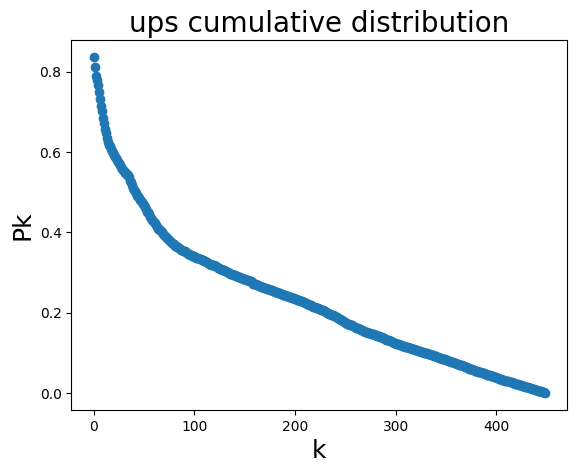

In [41]:
# plot ups distribution
import numpy as np
ups = np.squeeze(np.array(final_df["ups"]+1))
k = np.unique(ups)
pk = np.histogram(ups,k)[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(Pk,'o')
plt.title("ups cumulative distribution", size=20)
plt.xlabel("k", size=18)
plt.ylabel("Pk", size=18)
plt.show()

# **Assignment for the class!!!**

*   show the distribution of the number of comments
*   and that of the upvote ratio (will need to round it to percent values)



In [ ]:
# complete your assignment here!!!


# Select only most voted posts
This will reduce the number of comments to download lately

In [47]:
# keep only those posts that have more than 200 ups
final_df_selected = final_df.copy()
final_df_selected = final_df_selected.loc[final_df_selected['ups'] >=200]
display(final_df_selected)

,id,created,subreddit,title,selftext,author,author_fullname,upvote_ratio,ups,num_comments
0,17llfpj,2023-11-01,worldnews,Pope says two-state solution needed for Israel...,,wesipred,t2_vawm33cl,0.88,4647,1489
1,174atj1,2023-10-10,worldnews,Israel-Palestine conflict: Indian hackers hack...,,FearlessRestaurant98,t2_idqk69mip,0.93,1907,387
2,16g722n,2023-09-11,worldnews,Meta deletes Al Jazeera presenter’s profile af...,,PoorIsTheNewSwag,t2_5aj1xg7a,0.88,1630,225
3,12qfptp,2023-04-18,worldnews,China ready to broker Israel-Palestine peace t...,,Johannes_P,t2_rcr7w,0.84,716,539
4,175x8lw,2023-10-12,worldnews,Palestine envoy urges India to step in to reso...,,shrigay,t2_pomj0sib,0.84,639,341
...,...,...,...,...,...,...,...,...,...,...
928,17bvgfx,2023-10-19,IsraelPalestine,Why are pro-Palestine rioters in Europe target...,Since the rocket misfired on a hospital in Gaz...,MultiheadAttention,t2_a2c8fb7j,0.83,223,514
929,17kax8e,2023-10-31,IsraelPalestine,Lack of support for israel globally is actuall...,I have been seeing on instagram since October ...,Silly_Log_4140,t2_tmi2krti,0.67,222,1945
930,17jsw26,2023-10-30,IsraelPalestine,"Start the conversation with ""Does Israel deser...",People are having debates about the intricacie...,Nevergonnawork1,t2_ed0ae5avf,0.78,223,1237
931,17jae6r,2023-10-29,IsraelPalestine,"The Arab world doesn't care for Palestinians, ...","October 7th happened, the Arab world denied it...",ronthegr8,t2_8jc053j3,0.84,213,193


# Step 4: Extracting Comments for Reddit Posts

This code snippet outlines the process of extracting comments related to Reddit posts. It utilizes the Python Reddit API Wrapper (PRAW) library and the information obtained from the previous steps. The explanation of the code is as follows:

### Data Retrieval Loop -- **'extract_comments' function**

The data retrieval process unfolds in a sequence of steps:

1. Iterate through the different post's unique identifier (`post_id`) as a parameter.

2. Within the function, a Reddit post submission is retrieved using the provided `post_id`. This submission object represents the specific post on Reddit.

3. To ensure all comments are retrieved, the code uses `submission.comments.replace_more(limit=None)` to replace more comments. This is necessary because Reddit employs a "load more comments" mechanism that can hide some comments from direct retrieval. This function effectively retrieves all comments.

4. he code then iterates through the comments using a list comprehension. For each comment, it extracts all relevant info and stores it in a dataframe format.


### Data Processing

After obtaining the data, we keep useful entries only, e.g., the author's username, post title, URL, the number of upvotes, and more.

In general, selected entries can be chosen among the following list: '_replies', '_submission', '_reddit', 'subreddit_id', 'approved_at_utc', 'author_is_blocked', 'comment_type', 'awarders', 'mod_reason_by', 'banned_by', 'author_flair_type', 'total_awards_received', 'subreddit', 'author_flair_template_id', 'likes', 'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'collapsed_reason_code', 'no_follow', 'author', 'can_mod_post', 'created_utc', 'send_replies', 'parent_id', 'score', 'author_fullname', 'approved_by', 'mod_note', 'all_awardings', 'collapsed', 'body', 'edited', 'top_awarded_type', 'author_flair_css_class', 'name', 'is_submitter', 'downs', 'author_flair_richtext', 'author_patreon_flair', 'body_html', 'removal_reason', 'collapsed_reason', 'distinguished', 'associated_award', 'stickied', 'author_premium', 'can_gild', 'gildings', 'unrepliable_reason', 'author_flair_text_color', 'score_hidden', 'permalink', 'subreddit_type', 'locked', 'report_reasons', 'created', 'author_flair_text', 'treatment_tags', 'link_id', 'subreddit_name_prefixed', 'controversiality', 'depth', 'author_flair_background_color', 'collapsed_because_crowd_control', 'mod_reports', 'num_reports', 'ups', '_fetched', 'media_metadata'




In [48]:
def extract_comments(post_id_list):

    all_comments = []

    for i in range(len(post_id_list)):

        try:
            post_id = post_id_list[i]
            submission = reddit.submission(id=post_id)
            submission.comments.replace_more(limit=None)
            collected_comments = list(submission.comments)
            all_comments.extend(collected_comments)
            print(f"Downloaded {len(collected_comments)} comments for post number {i}, id = {post_id}")

        except Exception as error:
            print(f"Rate limit exceeded. Waiting for a moment. Error: {error}")
            time.sleep(7)
            continue

    df = pd.DataFrame(vars(post) for post in all_comments)
    print('a total of ' + str(len(df)) + ' comments have been retrieved')
    return df

In [50]:
# read data from Reddit
comments_df = extract_comments(list(final_df_selected['id']))

# select useful entries
comments_df = comments_df[['id','parent_id','created','subreddit','body',
         'author','author_fullname','ups','downs']]

# convert timestamp to a readable format
comments_df["created"] = [datetime.date.fromtimestamp(i) for i in comments_df["created"]]

# store to csv form
comments_df.to_csv('drive/MyDrive/Colab Notebooks/NSlab1/reddit_comments.csv', index=True)

# show data
display(comments_df)

Rate limit exceeded. Waiting for a moment. Error: received 429 HTTP response
Downloaded 42 comments for post number 1, id = 174atj1
Downloaded 22 comments for post number 2, id = 16g722n
Downloaded 83 comments for post number 3, id = 12qfptp
Downloaded 72 comments for post number 4, id = 175x8lw
Downloaded 19 comments for post number 5, id = 178zbej
Downloaded 18 comments for post number 6, id = zvsg7l
Downloaded 56 comments for post number 7, id = 179movs
Downloaded 78 comments for post number 8, id = 17mj5vb
Downloaded 133 comments for post number 9, id = 179v3ji
Downloaded 96 comments for post number 10, id = 17563g2
Downloaded 107 comments for post number 11, id = 17apo5m
Downloaded 139 comments for post number 12, id = 17rr37x
Downloaded 20 comments for post number 13, id = 173soqv
Downloaded 31 comments for post number 14, id = 1782b0q
Downloaded 49 comments for post number 15, id = 17rzwxg
Downloaded 42 comments for post number 16, id = 17avjjg
Downloaded 62 comments for post nu

,id,parent_id,created,subreddit,body,author,author_fullname,ups,downs
0,k487aqo,t3_174atj1,2023-10-10,worldnews,Israel just outsourced its cyberwar effort,hf12323,t2_4tfc5rfg,895,0
1,k485hl6,t3_174atj1,2023-10-10,worldnews,"The article unfortunately dropped a zero, citi...",bilgetea,t2_12bico,342,0
2,k48892n,t3_174atj1,2023-10-10,worldnews,They hacked it because the websites admin pass...,Concept-Plastic,t2_4bkxf8eu,223,0
3,k48q0pc,t3_174atj1,2023-10-10,worldnews,Canadians just seething right now. I don't kno...,jet-man_420,t2_7ec0yuo0,27,0
4,k48hbkk,t3_174atj1,2023-10-10,worldnews,During 1999 Kargil war (the war in which Pakis...,nakul-s,t2_6irsuese,214,0
...,...,...,...,...,...,...,...,...,...
14704,k8bj55w,t3_17q7sws,2023-11-08,IsraelPalestine,The Jews all came from Europe and Russia \nThe...,bobsled99,t2_9soqre7i,-9,0
14705,k8c7pq3,t3_17q7sws,2023-11-08,IsraelPalestine,"Biblical scholar Mark Smith, citing archaeolog...",Successful_Banana_43,t2_eibbxpzv,-5,0
14706,k8b55by,t3_17q7sws,2023-11-08,IsraelPalestine,They were actually both there first. But Jews ...,effcanarymission,t2_c4h94rwq,1,0
14707,k8g0p35,t3_17q7sws,2023-11-09,IsraelPalestine,Well before major Jewish migration back to Isr...,Nearing_retirement,t2_dwwdhq2p,1,0
